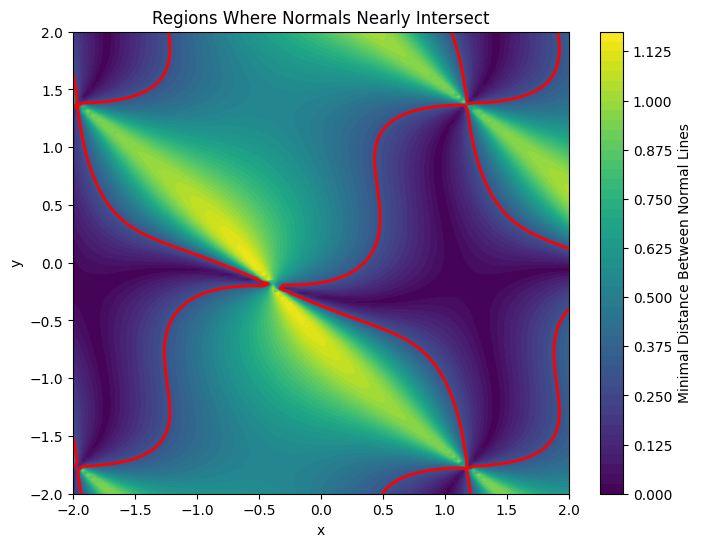

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the surface
def f(x, y):
    return np.sin(x)*np.cos(y)

def fx(x, y):
    return np.cos(x)*np.cos(y)

def fy(x, y):
    return -np.sin(x)*np.sin(y)

# Normal vector at (x,y)
def normal(x, y):
    # N = (f_x, f_y, -1)
    return np.array([fx(x,y), fy(x,y), -1.0])

# Parameters
a, b = 3.14/4, 3.14/8  # Offset in x and y
k_threshold = 0.3 # Distance threshold

# Create a grid of points
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute minimal distances
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i,j]
        y = Y[i,j]

        P = np.array([x, y, f(x,y)])
        U = normal(x,y)

        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a, y+b)

        # Compute cross product UxV
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)

        if cross_norm < 1e-12:
            # Lines nearly parallel; we can define distance differently
            # Distance between parallel lines can be found by projecting Q-P onto a perp direction
            # But let's just set a large distance to indicate no close intersection.
            distances[i,j] = np.inf
        else:
            # Minimal distance formula:
            QP = Q - P
            dist = abs(np.dot(QP, cross)) / cross_norm
            distances[i,j] = dist

# Plot the resulting map
fig, ax = plt.subplots(figsize=(8,6))
contour = ax.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Minimal Distance Between Normal Lines')

# Highlight where the distance is below the threshold k_threshold
ax.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)

ax.set_title("Regions Where Normals Nearly Intersect")
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

We're now interested in capturing how this would look like for other spaces.

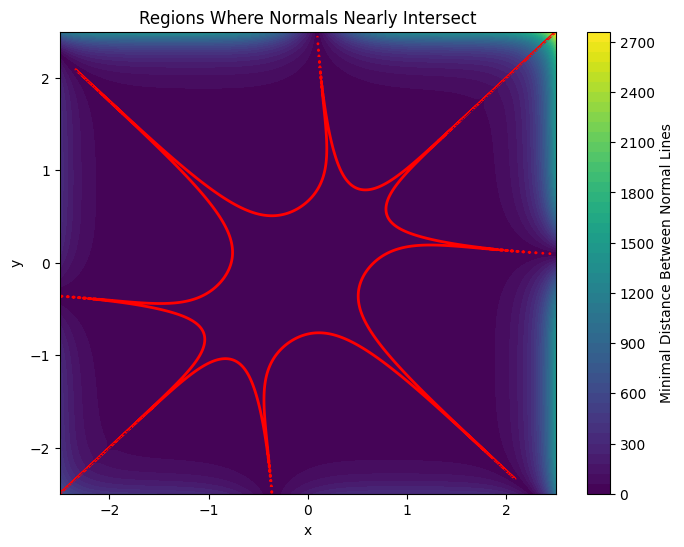

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Define the surface
def f(x, y):
    return np.exp(x**2) + np.exp(y**2)

def fx(x, y):
    return 2*x*np.exp(x**2)

def fy(x, y):
    return 2*y*np.exp(y**2)

# Normal vector at (x,y)
def normal(x, y):
    # N = (f_x, f_y, -1)
    return np.array([fx(x,y), fy(x,y), -1.0])

# Parameters
a, b = 0.25, 0.25  # Offset in x and y
k_threshold = 0.2 # Distance threshold

# Create a grid of points
x_vals = np.linspace(-2.5, 2.5, 1000)
y_vals = np.linspace(-2.5, 2.5, 1000)
X, Y = np.meshgrid(x_vals, y_vals)

# Compute minimal distances
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i,j]
        y = Y[i,j]

        P = np.array([x, y, f(x,y)])
        U = normal(x,y)

        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a, y+b)

        # Compute cross product UxV
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)

        if cross_norm < 1e-12:
            # Lines nearly parallel; we can define distance differently
            # Distance between parallel lines can be found by projecting Q-P onto a perp direction
            # But let's just set a large distance to indicate no close intersection.
            distances[i,j] = np.inf
        else:
            # Minimal distance formula:
            QP = Q - P
            dist = abs(np.dot(QP, cross)) / cross_norm
            distances[i,j] = dist

# Plot the resulting map
fig, ax = plt.subplots(figsize=(8,6))
contour = ax.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax)
cbar.set_label('Minimal Distance Between Normal Lines')

# Highlight where the distance is below the threshold k_threshold
ax.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)

ax.set_title("Regions Where Normals Nearly Intersect")
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

I have no idea what I'm seeing, but I've never seen anything like this before, and it feels very relevant to understanding "inner order dynamics" of particles, and that is how we approach their understanding.

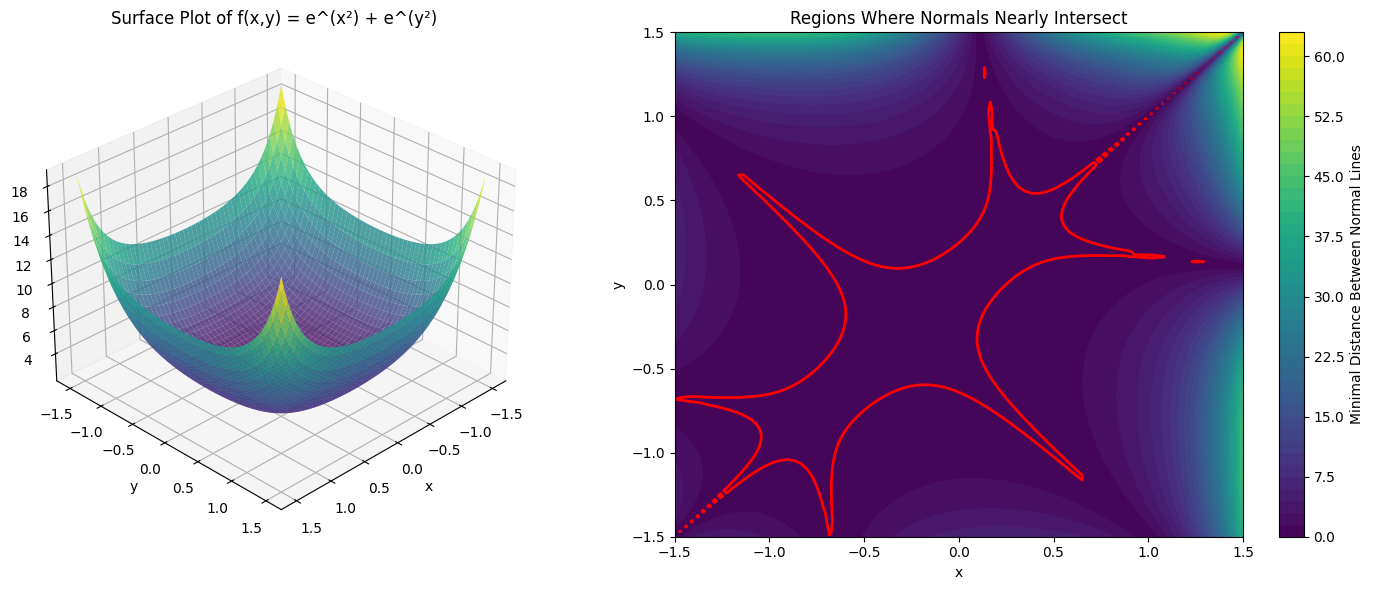

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the surface
def f(x, y):
    return np.exp(x**2) + np.exp(y**2)

def fx(x, y):
    return 2*x*np.exp(x**2)

def fy(x, y):
    return 2*y*np.exp(y**2)

# Normal vector at (x,y)
def normal(x, y):
    return np.array([fx(x,y), fy(x,y), -1.0])

# Parameters
a, b = 0.5, 0.5  
k_threshold = 0.1

# Create grid
x_vals = np.linspace(-1.5, 1.5, 100)
y_vals = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Compute minimal distances
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i,j]
        y = Y[i,j]
        
        P = np.array([x, y, f(x,y)])
        U = normal(x,y)
        
        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a, y+b)
        
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)
        
        if cross_norm < 1e-12:
            distances[i,j] = np.inf
        else:
            QP = Q - P
            dist = abs(np.dot(QP, cross)) / cross_norm
            distances[i,j] = dist

# Create figure with two subplots
fig = plt.figure(figsize=(15, 6))

# 3D Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)  # Isometric-like view

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

Let's do do $e^{-x^2} + e^{-y^2}$

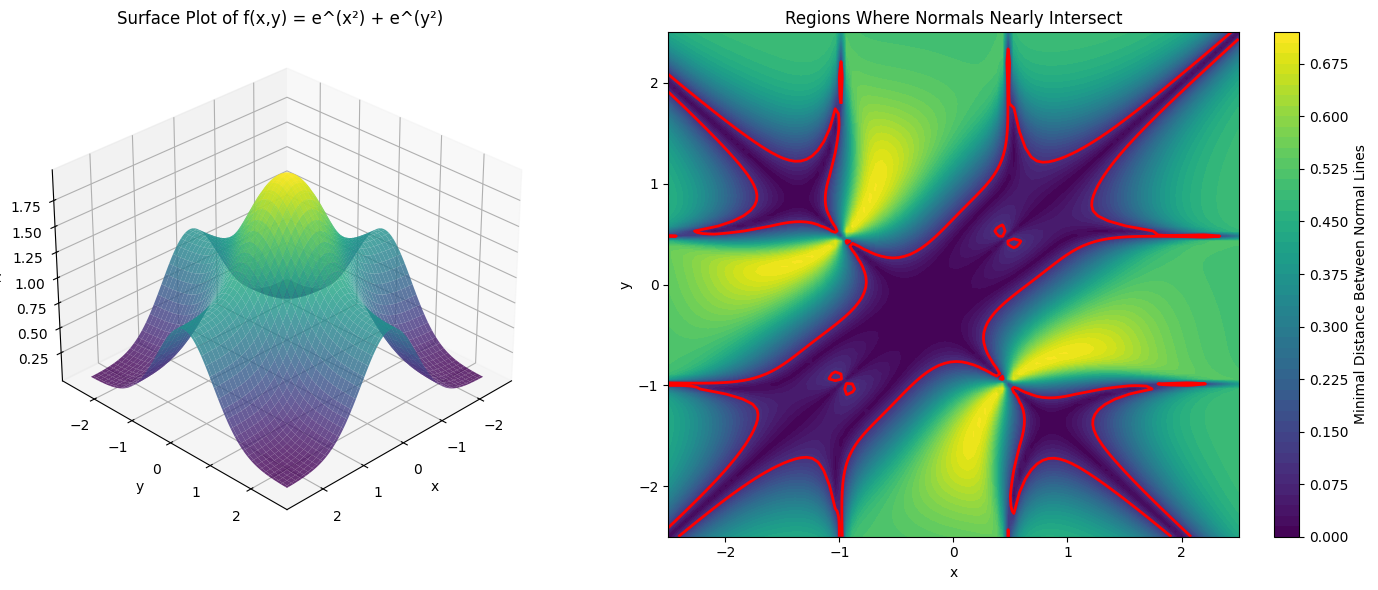

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the surface
def f(x, y):
    return np.exp(-x**2) + np.exp(-y**2)

def fx(x, y):
    return 2*x*np.exp(-x**2)

def fy(x, y):
    return 2*y*np.exp(-y**2)

# Normal vector at (x,y)
def normal(x, y):
    return np.array([fx(x,y), fy(x,y), -1.0])

# Parameters
a, b = 0.5, 0.5  
k_threshold = 0.1

# Create grid
x_vals = np.linspace(-2.5, 2.5, 100)
y_vals = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Compute minimal distances
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i,j]
        y = Y[i,j]
        
        P = np.array([x, y, f(x,y)])
        U = normal(x,y)
        
        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a, y+b)
        
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)
        
        if cross_norm < 1e-12:
            distances[i,j] = np.inf
        else:
            QP = Q - P
            dist = abs(np.dot(QP, cross)) / cross_norm
            distances[i,j] = dist

# Create figure with two subplots
fig = plt.figure(figsize=(15, 6))

# 3D Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)  # Isometric-like view

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

I'm going to add the contour on the 3D graph.

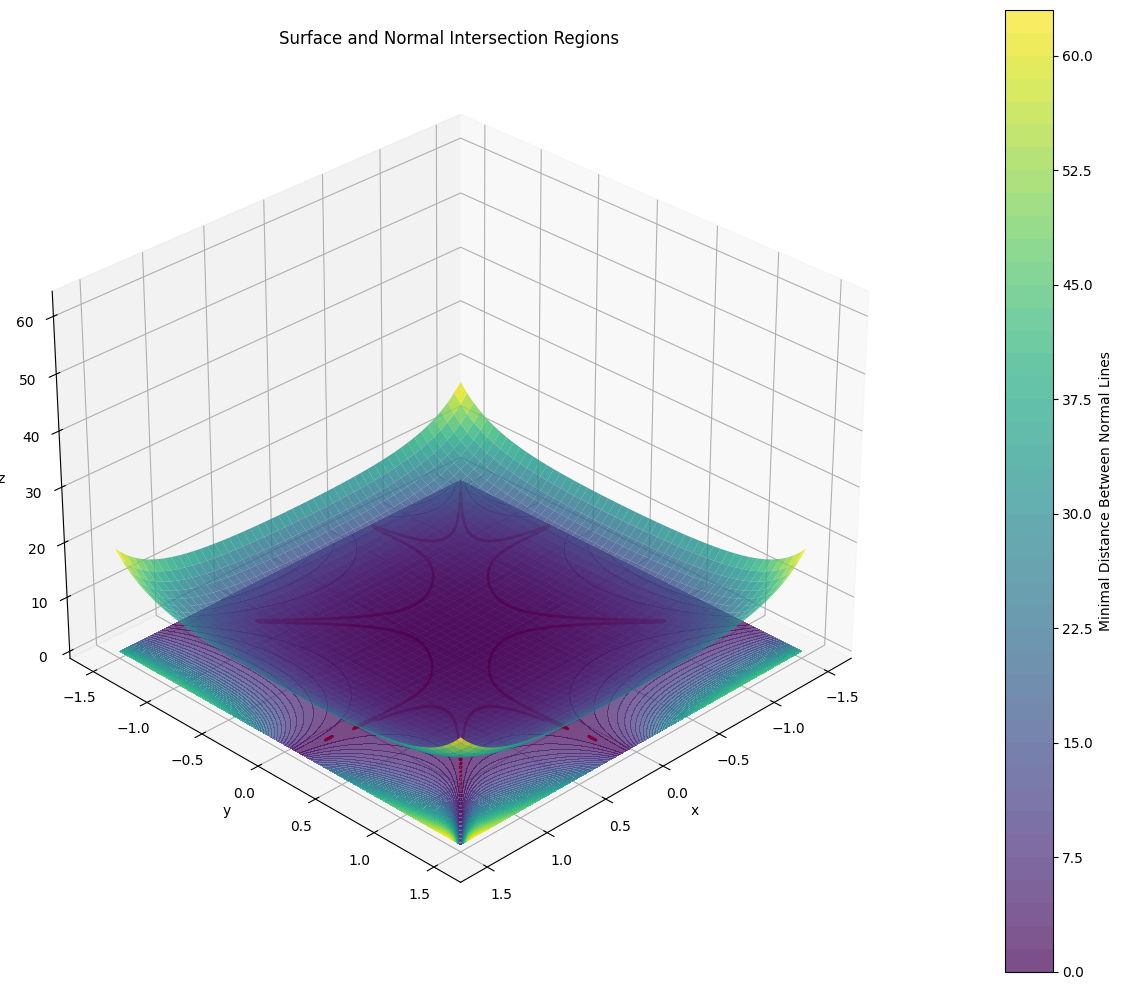

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the surface
def f(x, y):
    return np.exp(x**2) + np.exp(y**2)

def fx(x, y):
    return 2*x*np.exp(x**2)

def fy(x, y):
    return 2*y*np.exp(y**2)

# Normal vector at (x,y)
def normal(x, y):
    return np.array([fx(x,y), fy(x,y), -1.0])

# Parameters
a, b = 0.5, 0.5  
k_threshold = 0.1

# Create grid
x_vals = np.linspace(-1.5, 1.5, 100)
y_vals = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Compute minimal distances
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i,j]
        y = Y[i,j]
        
        P = np.array([x, y, f(x,y)])
        U = normal(x,y)
        
        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a, y+b)
        
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)
        
        if cross_norm < 1e-12:
            distances[i,j] = np.inf
        else:
            QP = Q - P
            dist = abs(np.dot(QP, cross)) / cross_norm
            distances[i,j] = dist

# Create figure
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Plot contour on a shifted z-plane
z_offset = np.min(Z) - 2  # Offset below the surface
contour = ax.contour(X, Y, distances, levels=[k_threshold], 
                    colors='red', linewidths=2, offset=z_offset)

# Add distance map as a contourf plot
contourf = ax.contourf(X, Y, distances, levels=50, 
                      offset=z_offset, cmap='viridis', alpha=0.7)

# Customize the view
ax.view_init(elev=30, azim=45)
ax.set_title("Surface and Normal Intersection Regions")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Add colorbar
cbar = plt.colorbar(contourf, ax=ax, pad=0.1)
cbar.set_label('Minimal Distance Between Normal Lines')

plt.tight_layout()
plt.show()

Let's add some space in the bigger domain

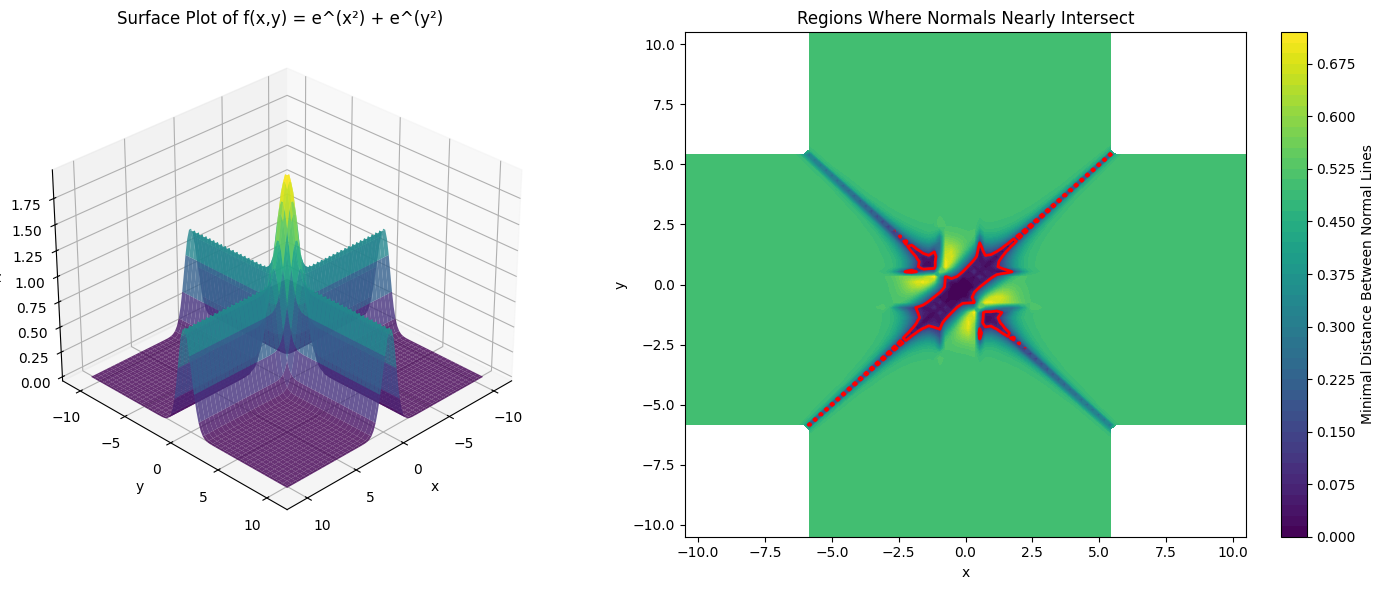

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the surface
def f(x, y):
    return np.exp(-x**2) + np.exp(-y**2)

def fx(x, y):
    return 2*x*np.exp(-x**2)

def fy(x, y):
    return 2*y*np.exp(-y**2)

# Normal vector at (x,y)
def normal(x, y):
    return np.array([fx(x,y), fy(x,y), -1.0])

# Parameters
a, b = 0.5, 0.5  
k_threshold = 0.1

# Create grid
x_vals = np.linspace(-10.5, 10.5, 100)
y_vals = np.linspace(-10.5, 10.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Compute minimal distances
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i,j]
        y = Y[i,j]
        
        P = np.array([x, y, f(x,y)])
        U = normal(x,y)
        
        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a, y+b)
        
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)
        
        if cross_norm < 1e-12:
            distances[i,j] = np.inf
        else:
            QP = Q - P
            dist = abs(np.dot(QP, cross)) / cross_norm
            distances[i,j] = dist

# Create figure with two subplots
fig = plt.figure(figsize=(15, 6))

# 3D Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)  # Isometric-like view

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

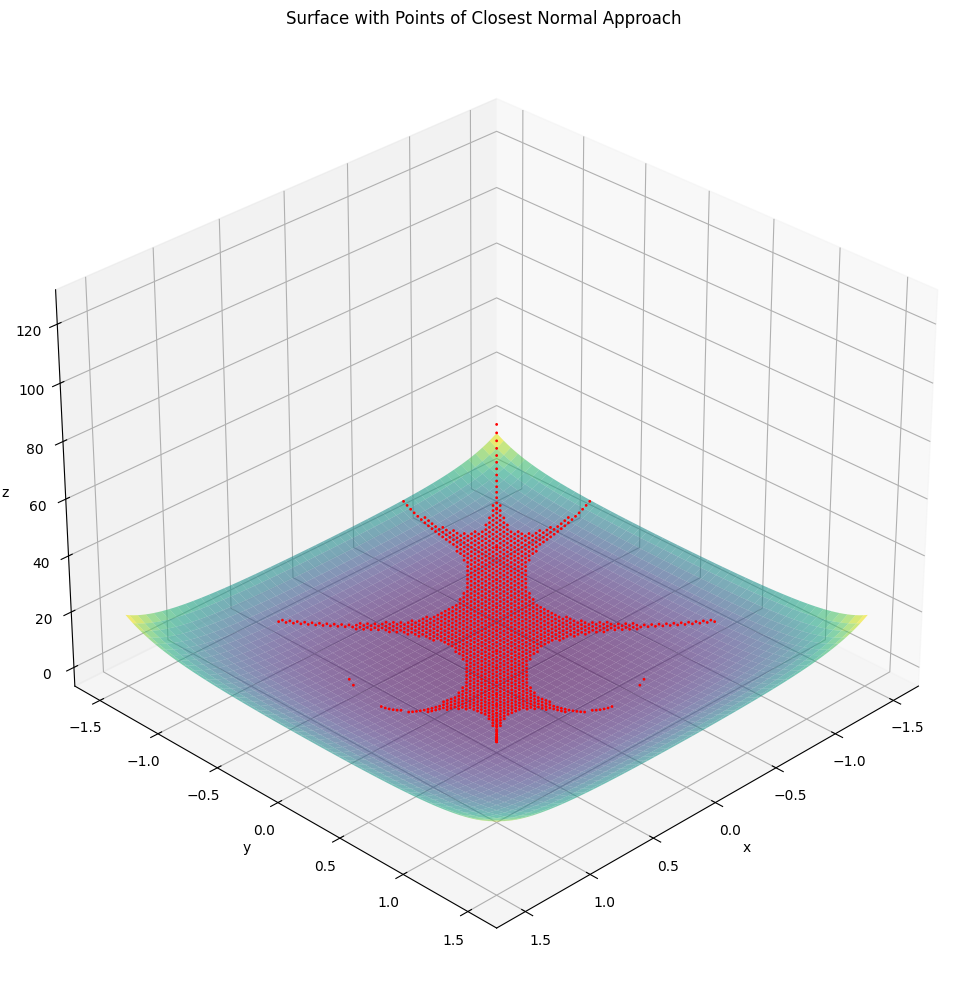

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return np.exp(x**2) + np.exp(y**2)

def fx(x, y):
    return 2*x*np.exp(x**2)

def fy(x, y):
    return 2*y*np.exp(y**2)

def normal(x, y):
    return np.array([fx(x,y), fy(x,y), -1.0])

def closest_point_between_lines(P, U, Q, V):
    """
    Find the points of closest approach between two lines
    P + sU and Q + tV where P,Q are points and U,V are direction vectors
    Returns the z-coordinate of the midpoint between closest points
    """
    # Calculate parameters s and t for closest points
    w0 = P - Q
    a = np.dot(U, U)
    b = np.dot(U, V)
    c = np.dot(V, V)
    d = np.dot(U, w0)
    e = np.dot(V, w0)
    
    denom = a*c - b*b
    if abs(denom) < 1e-10:
        return np.inf
    
    s = (b*e - c*d) / denom
    t = (a*e - b*d) / denom
    
    # Points of closest approach
    P_closest = P + s*U
    Q_closest = Q + t*V
    
    # Return z-coordinate of midpoint
    return (P_closest[2] + Q_closest[2]) / 2

# Parameters
a, b = 0.5, 0.5
x_vals = np.linspace(-1.5, 1.5, 100)
y_vals = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Compute z-coordinates of closest approach points
Z_closest = np.zeros_like(X)
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x, y = X[i,j], Y[i,j]
        
        P = np.array([x, y, f(x,y)])
        U = normal(x,y)
        U = U / np.linalg.norm(U)  # normalize
        
        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a,y+b)
        V = V / np.linalg.norm(V)  # normalize
        
        Z_closest[i,j] = closest_point_between_lines(P, U, Q, V)
        
        # Also calculate distance for coloring
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)
        if cross_norm < 1e-12:
            distances[i,j] = np.inf
        else:
            QP = Q - P
            distances[i,j] = abs(np.dot(QP, cross)) / cross_norm

# Create figure
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Plot closest approach points where distance is below threshold
mask = distances < 0.1
ax.scatter(X[mask], Y[mask], Z_closest[mask], 
          c='red', s=1, alpha=1)

ax.view_init(elev=30, azim=45)
ax.set_title("Surface with Points of Closest Normal Approach")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.tight_layout()
plt.show()

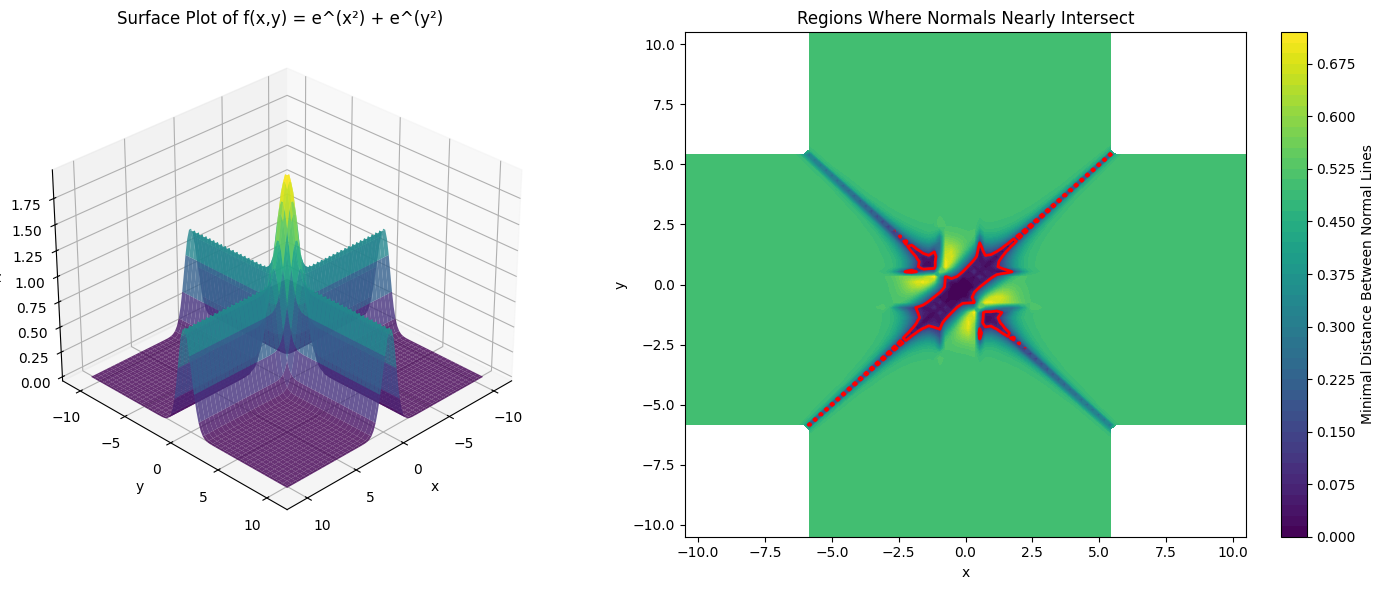

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the surface
def f(x, y):
    return np.exp(-x**2) + np.exp(-y**2)

def fx(x, y):
    return 2*x*np.exp(-x**2)

def fy(x, y):
    return 2*y*np.exp(-y**2)

# Normal vector at (x,y)
def normal(x, y):
    return np.array([fx(x,y), fy(x,y), -1.0])

# Parameters
a, b = 0.5, 0.5  
k_threshold = 0.1

# Create grid
x_vals = np.linspace(-10.5, 10.5, 100)
y_vals = np.linspace(-10.5, 10.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Compute minimal distances
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i,j]
        y = Y[i,j]
        
        P = np.array([x, y, f(x,y)])
        U = normal(x,y)
        
        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a, y+b)
        
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)
        
        if cross_norm < 1e-12:
            distances[i,j] = np.inf
        else:
            QP = Q - P
            dist = abs(np.dot(QP, cross)) / cross_norm
            distances[i,j] = dist

# Create figure with two subplots
fig = plt.figure(figsize=(15, 6))

# 3D Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)  # Isometric-like view

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

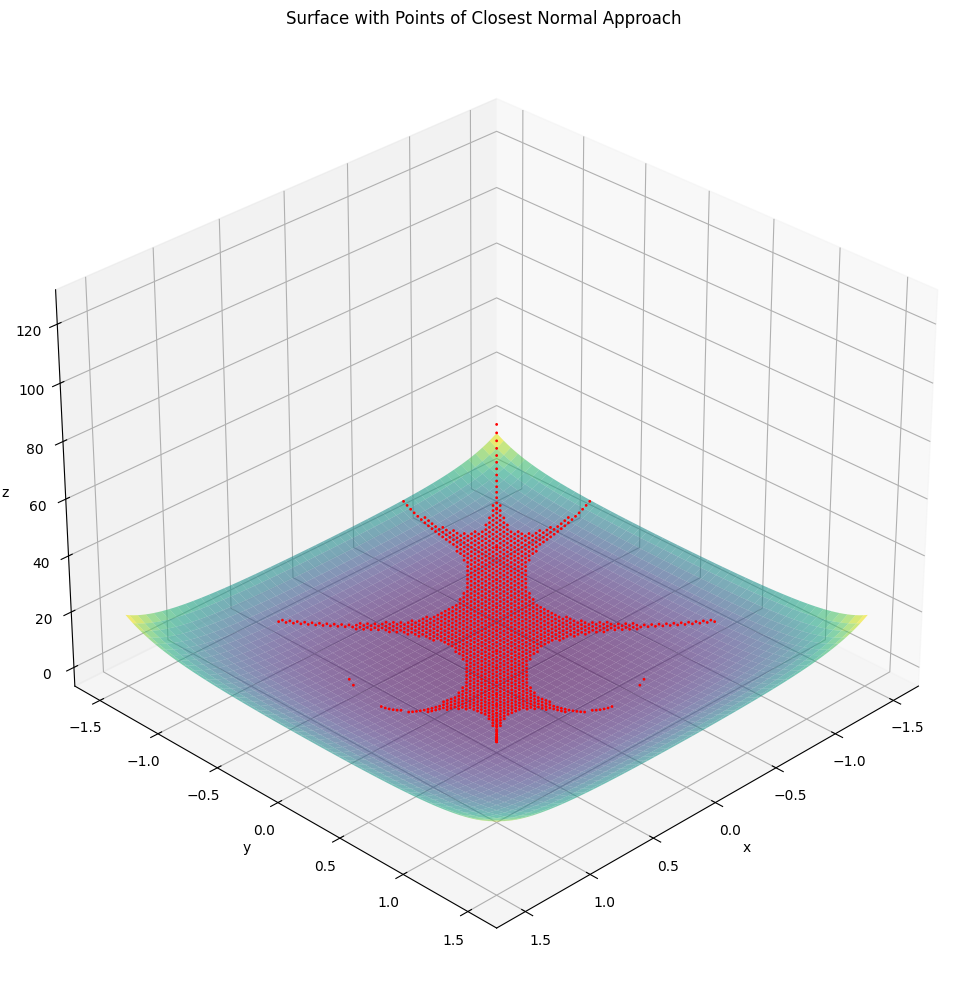

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return np.exp(x**2) + np.exp(y**2)

def fx(x, y):
    return 2*x*np.exp(x**2)

def fy(x, y):
    return 2*y*np.exp(y**2)

def normal(x, y):
    return np.array([fx(x,y), fy(x,y), -1.0])

def closest_point_between_lines(P, U, Q, V):
    """
    Find the points of closest approach between two lines
    P + sU and Q + tV where P,Q are points and U,V are direction vectors
    Returns the z-coordinate of the midpoint between closest points
    """
    # Calculate parameters s and t for closest points
    w0 = P - Q
    a = np.dot(U, U)
    b = np.dot(U, V)
    c = np.dot(V, V)
    d = np.dot(U, w0)
    e = np.dot(V, w0)
    
    denom = a*c - b*b
    if abs(denom) < 1e-10:
        return np.inf
    
    s = (b*e - c*d) / denom
    t = (a*e - b*d) / denom
    
    # Points of closest approach
    P_closest = P + s*U
    Q_closest = Q + t*V
    
    # Return z-coordinate of midpoint
    return (P_closest[2] + Q_closest[2]) / 2

# Parameters
a, b = 0.5, 0.5
x_vals = np.linspace(-1.5, 1.5, 100)
y_vals = np.linspace(-1.5, 1.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Compute z-coordinates of closest approach points
Z_closest = np.zeros_like(X)
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x, y = X[i,j], Y[i,j]
        
        P = np.array([x, y, f(x,y)])
        U = normal(x,y)
        U = U / np.linalg.norm(U)  # normalize
        
        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a,y+b)
        V = V / np.linalg.norm(V)  # normalize
        
        Z_closest[i,j] = closest_point_between_lines(P, U, Q, V)
        
        # Also calculate distance for coloring
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)
        if cross_norm < 1e-12:
            distances[i,j] = np.inf
        else:
            QP = Q - P
            distances[i,j] = abs(np.dot(QP, cross)) / cross_norm

# Create figure
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)

# Plot closest approach points where distance is below threshold
mask = distances < 0.1
ax.scatter(X[mask], Y[mask], Z_closest[mask], 
          c='red', s=1, alpha=1)

ax.view_init(elev=30, azim=45)
ax.set_title("Surface with Points of Closest Normal Approach")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.tight_layout()
plt.show()

Let's plot it with the function there.

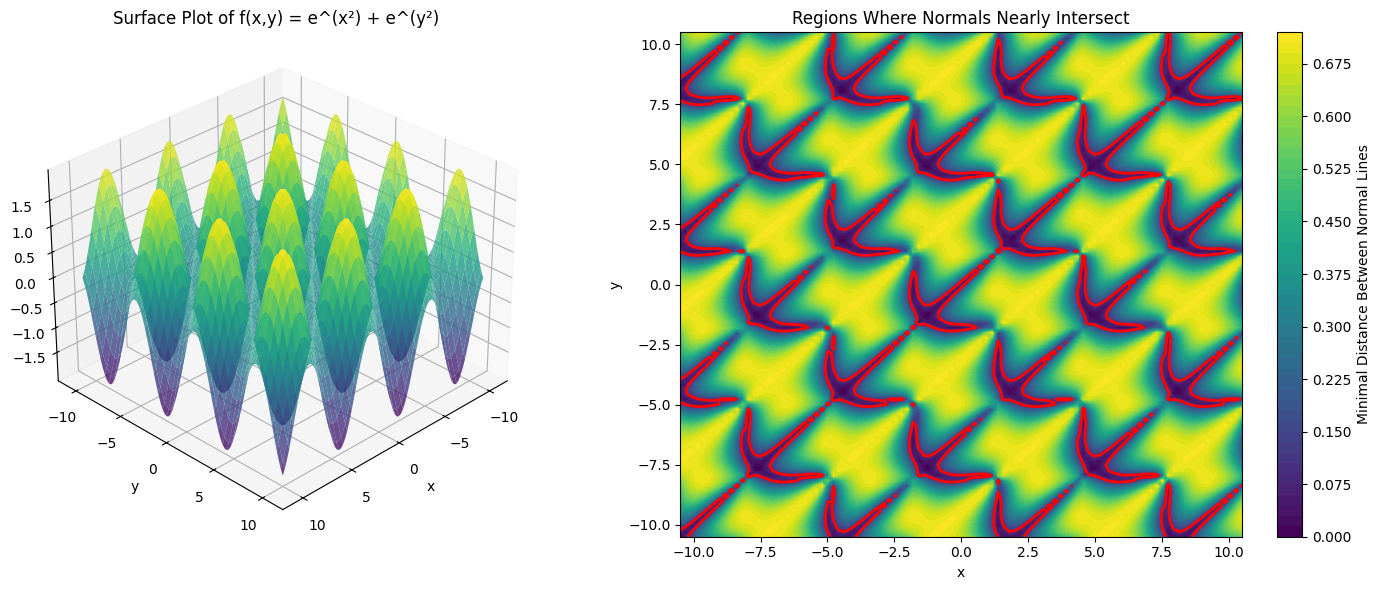

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the surface
def f(x, y):
    return np.sin(x) + np.sin(y)

def fx(x, y):
    return np.sin(x)

def fy(x, y):
    return np.sin(y)

# Normal vector at (x,y)
def normal(x, y):
    return np.array([fx(x,y), fy(x,y), -1.0])

# Parameters
a, b = 0.5, 0.5  
k_threshold = 0.1

# Create grid
x_vals = np.linspace(-10.5, 10.5, 100)
y_vals = np.linspace(-10.5, 10.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Compute minimal distances
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i,j]
        y = Y[i,j]
        
        P = np.array([x, y, f(x,y)])
        U = normal(x,y)
        
        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a, y+b)
        
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)
        
        if cross_norm < 1e-12:
            distances[i,j] = np.inf
        else:
            QP = Q - P
            dist = abs(np.dot(QP, cross)) / cross_norm
            distances[i,j] = dist

# Create figure with two subplots
fig = plt.figure(figsize=(15, 6))

# 3D Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)  # Isometric-like view

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

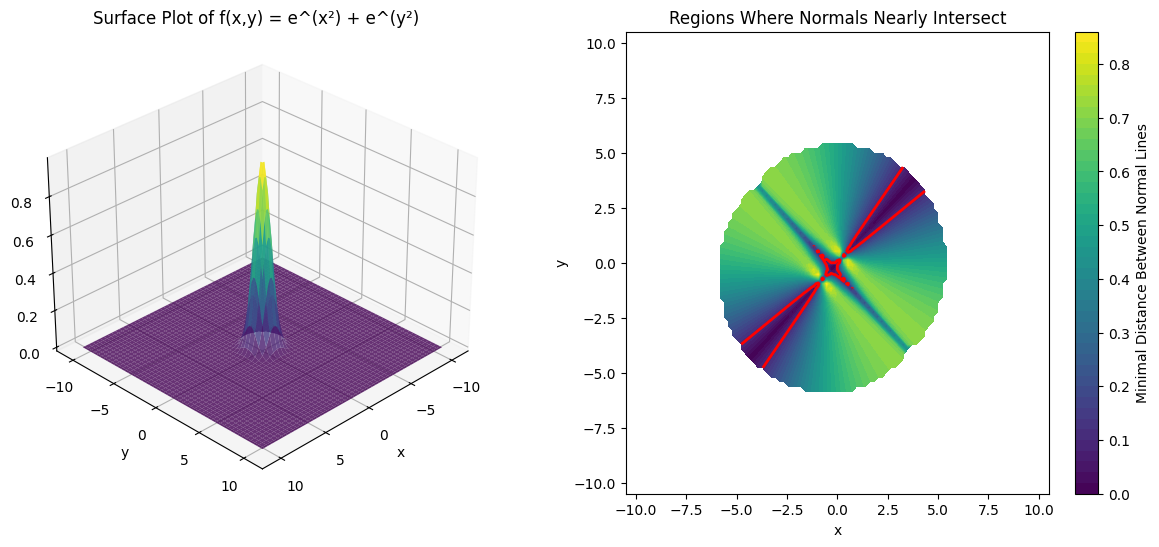

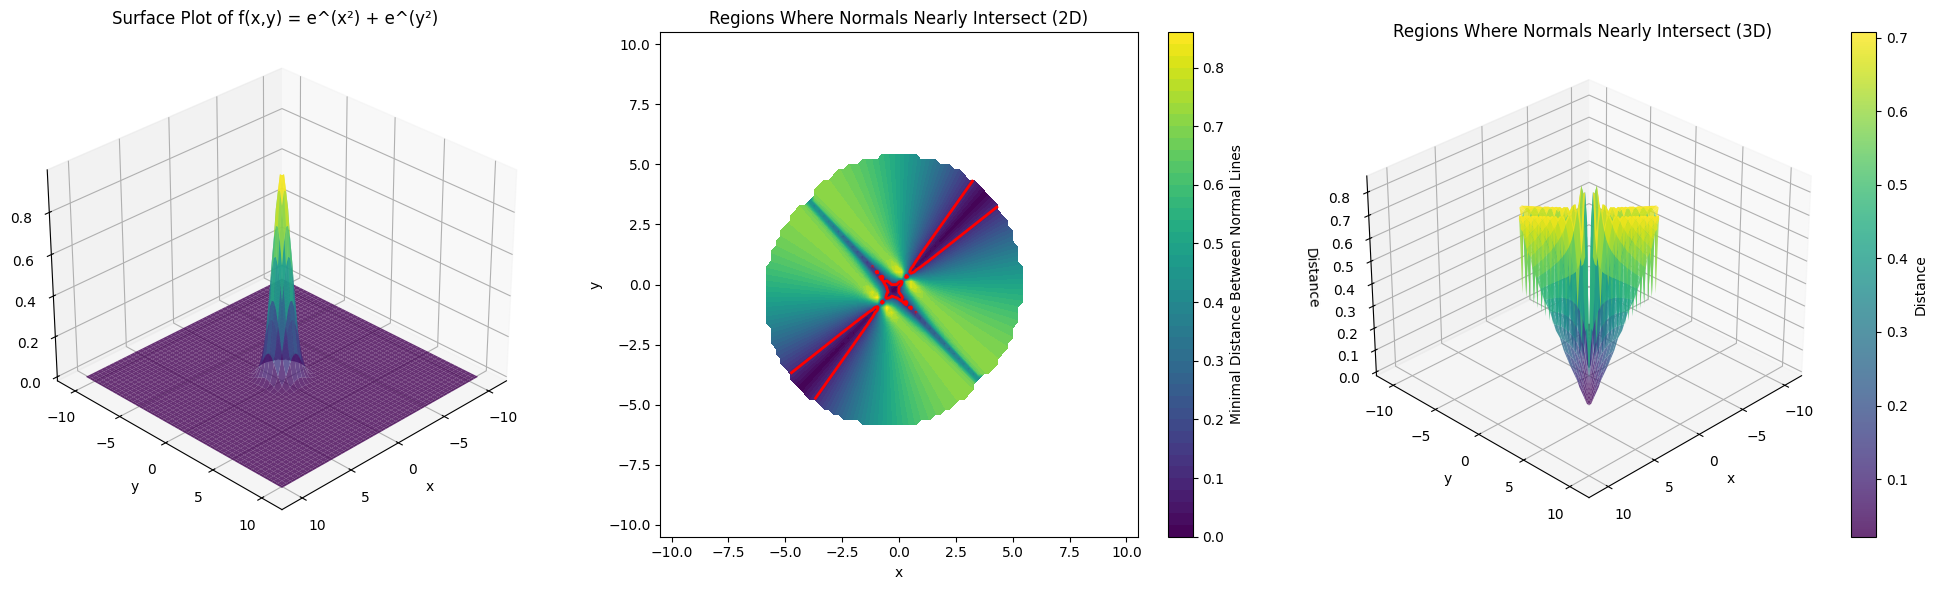

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the surface
def f(x, y):
    return np.exp(-(x**2 + y**2))  # Note: np.exp, not np.exp^

def fx(x, y):
    # Using chain rule: d/dx[exp(-x^2 - y^2)] = exp(-x^2 - y^2) * d/dx[-x^2 - y^2]
    return -2*x * np.exp(-(x**2 + y**2))

def fy(x, y):
    # Using chain rule: d/dy[exp(-x^2 - y^2)] = exp(-x^2 - y^2) * d/dy[-x^2 - y^2]
    return -2*y * np.exp(-(x**2 + y**2))

# Normal vector at (x,y)
def normal(x, y):
    return np.array([fx(x,y), fy(x,y), -1.0])

# Parameters
a, b = 0.5, 0.5  
k_threshold = 0.1

# Create grid
x_vals = np.linspace(-10.5, 10.5, 100)
y_vals = np.linspace(-10.5, 10.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Compute minimal distances
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i,j]
        y = Y[i,j]
        
        P = np.array([x, y, f(x,y)])
        U = normal(x,y)
        
        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a, y+b)
        
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)
        
        if cross_norm < 1e-12:
            distances[i,j] = np.inf
        else:
            QP = Q - P
            dist = abs(np.dot(QP, cross)) / cross_norm
            distances[i,j] = dist

# Create figure with two subplots
fig = plt.figure(figsize=(15, 6))

# 3D Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)  # Isometric-like view

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Modify the figure creation and plotting section:
fig = plt.figure(figsize=(20, 6))  # Increased width to accommodate third plot

# 3D Surface plot
ax1 = fig.add_subplot(131, projection='3d')  # Changed 121 to 131
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)

# Contour plot
ax2 = fig.add_subplot(132)  # Changed 122 to 132
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect (2D)")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# New 3D plot for intersections
ax3 = fig.add_subplot(133, projection='3d')
intersection_plot = ax3.plot_surface(X, Y, distances, cmap='viridis', alpha=0.8)
ax3.set_title("Regions Where Normals Nearly Intersect (3D)")
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('Distance')
ax3.view_init(elev=30, azim=45)
plt.colorbar(intersection_plot, ax=ax3, label='Distance')

plt.tight_layout()
plt.show()

Please put these together...

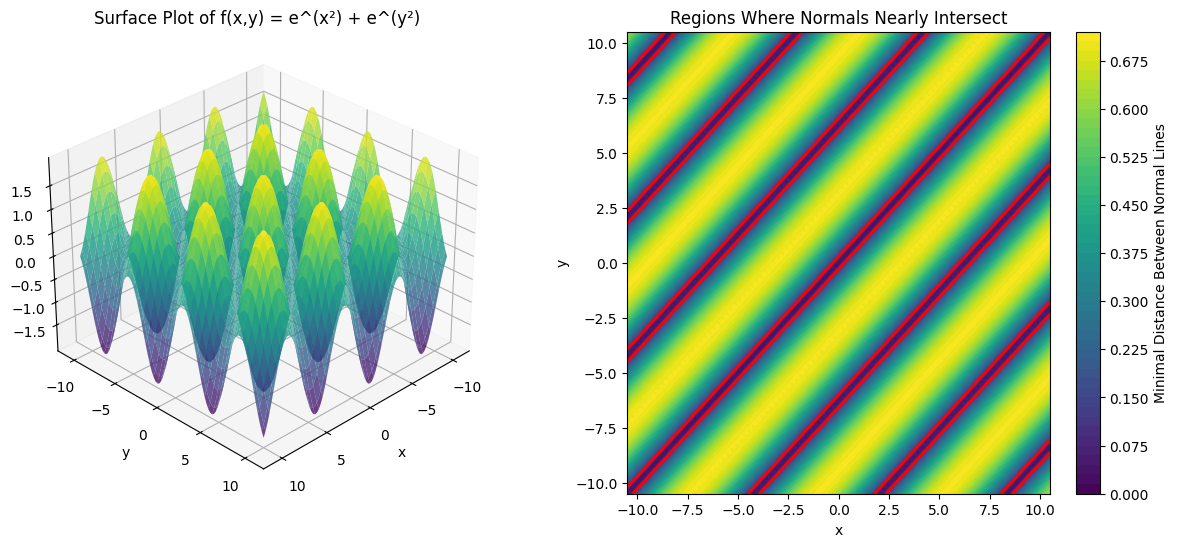

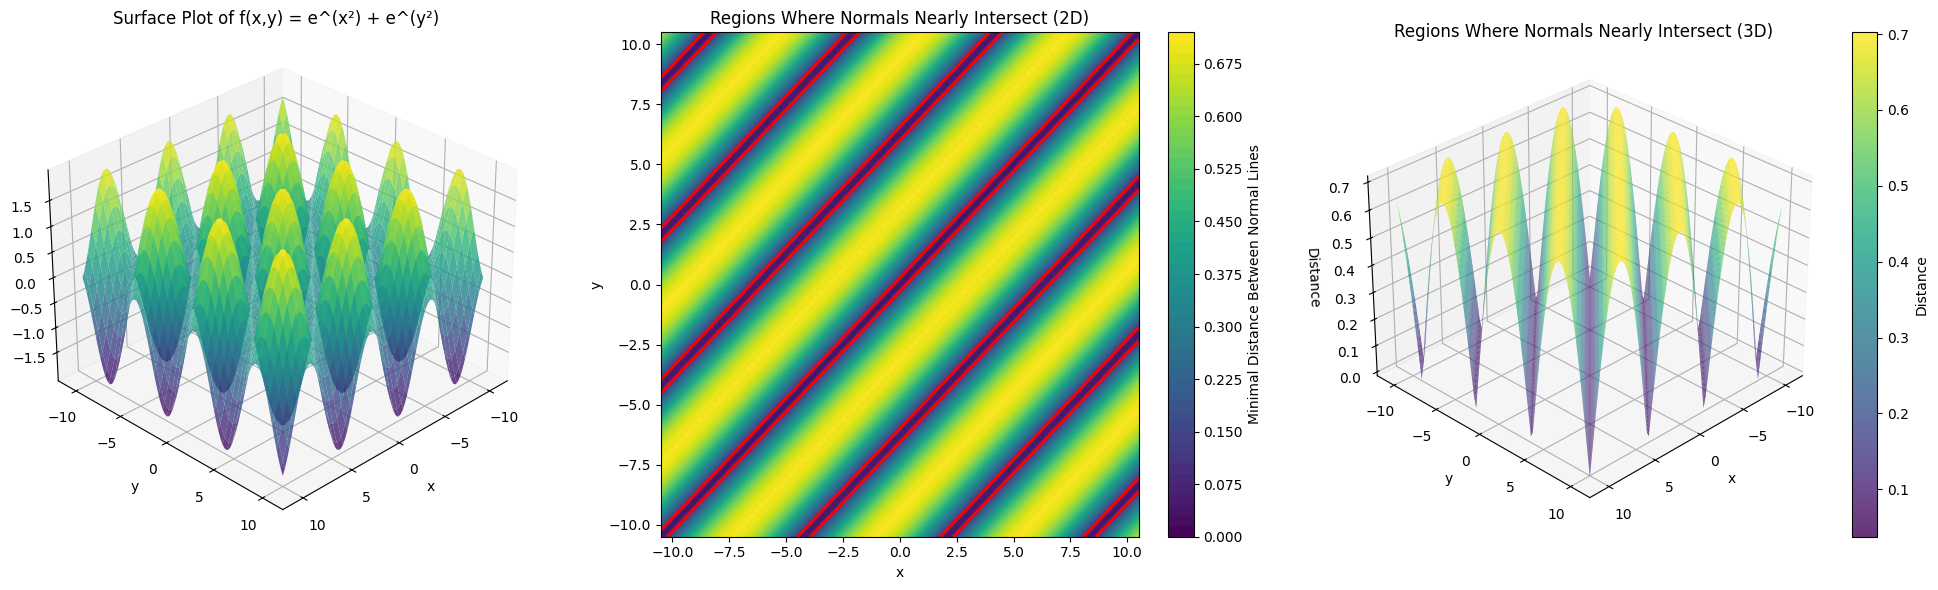

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the surface
def f(x, y):
    return np.sin(x) + np.sin(y)

def fx(x, y):
    # Using chain rule: d/dx[exp(-x^2 - y^2)] = exp(-x^2 - y^2) * d/dx[-x^2 - y^2]
    return np.cos(x) + np.sin(y)

def fy(x, y):
    # Using chain rule: d/dy[exp(-x^2 - y^2)] = exp(-x^2 - y^2) * d/dy[-x^2 - y^2]
    return np.sin(x) + np.cos(y)

# Normal vector at (x,y)
def normal(x, y):
    return np.array([fx(x,y), fy(x,y), -1.0])

# Parameters
a, b = 0.5, 0.5  
k_threshold = 0.1

# Create grid
x_vals = np.linspace(-10.5, 10.5, 100)
y_vals = np.linspace(-10.5, 10.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Compute minimal distances
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i,j]
        y = Y[i,j]
        
        P = np.array([x, y, f(x,y)])
        U = normal(x,y)
        
        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a, y+b)
        
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)
        
        if cross_norm < 1e-12:
            distances[i,j] = np.inf
        else:
            QP = Q - P
            dist = abs(np.dot(QP, cross)) / cross_norm
            distances[i,j] = dist

# Create figure with two subplots
fig = plt.figure(figsize=(15, 6))

# 3D Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)  # Isometric-like view

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Modify the figure creation and plotting section:
fig = plt.figure(figsize=(20, 6))  # Increased width to accommodate third plot

# 3D Surface plot
ax1 = fig.add_subplot(131, projection='3d')  # Changed 121 to 131
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)

# Contour plot
ax2 = fig.add_subplot(132)  # Changed 122 to 132
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect (2D)")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# New 3D plot for intersections
ax3 = fig.add_subplot(133, projection='3d')
intersection_plot = ax3.plot_surface(X, Y, distances, cmap='viridis', alpha=0.8)
ax3.set_title("Regions Where Normals Nearly Intersect (3D)")
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('Distance')
ax3.view_init(elev=30, azim=45)
plt.colorbar(intersection_plot, ax=ax3, label='Distance')

plt.tight_layout()
plt.show()

different k

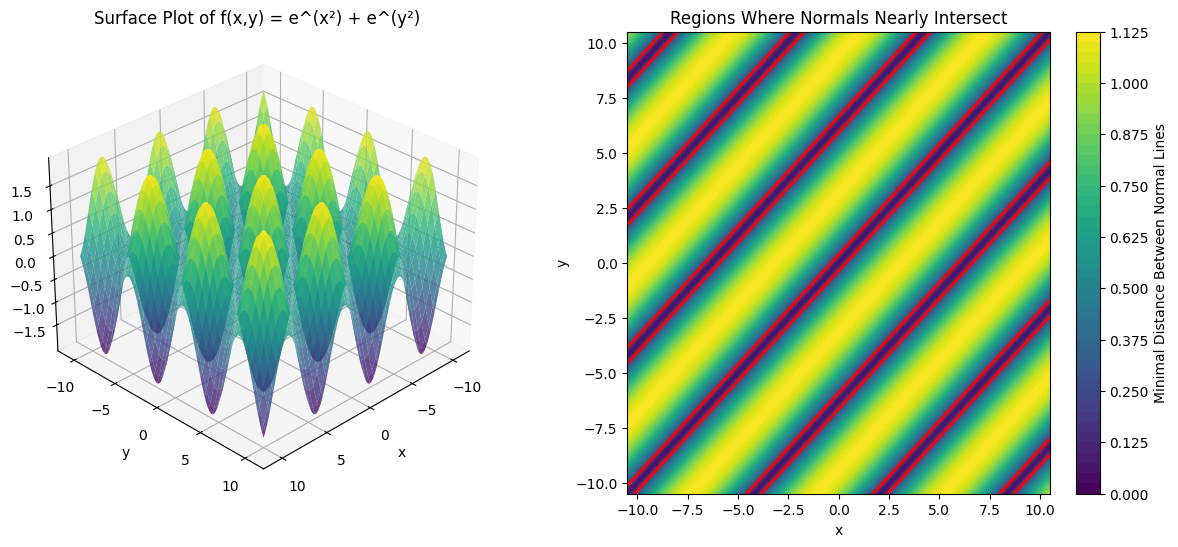

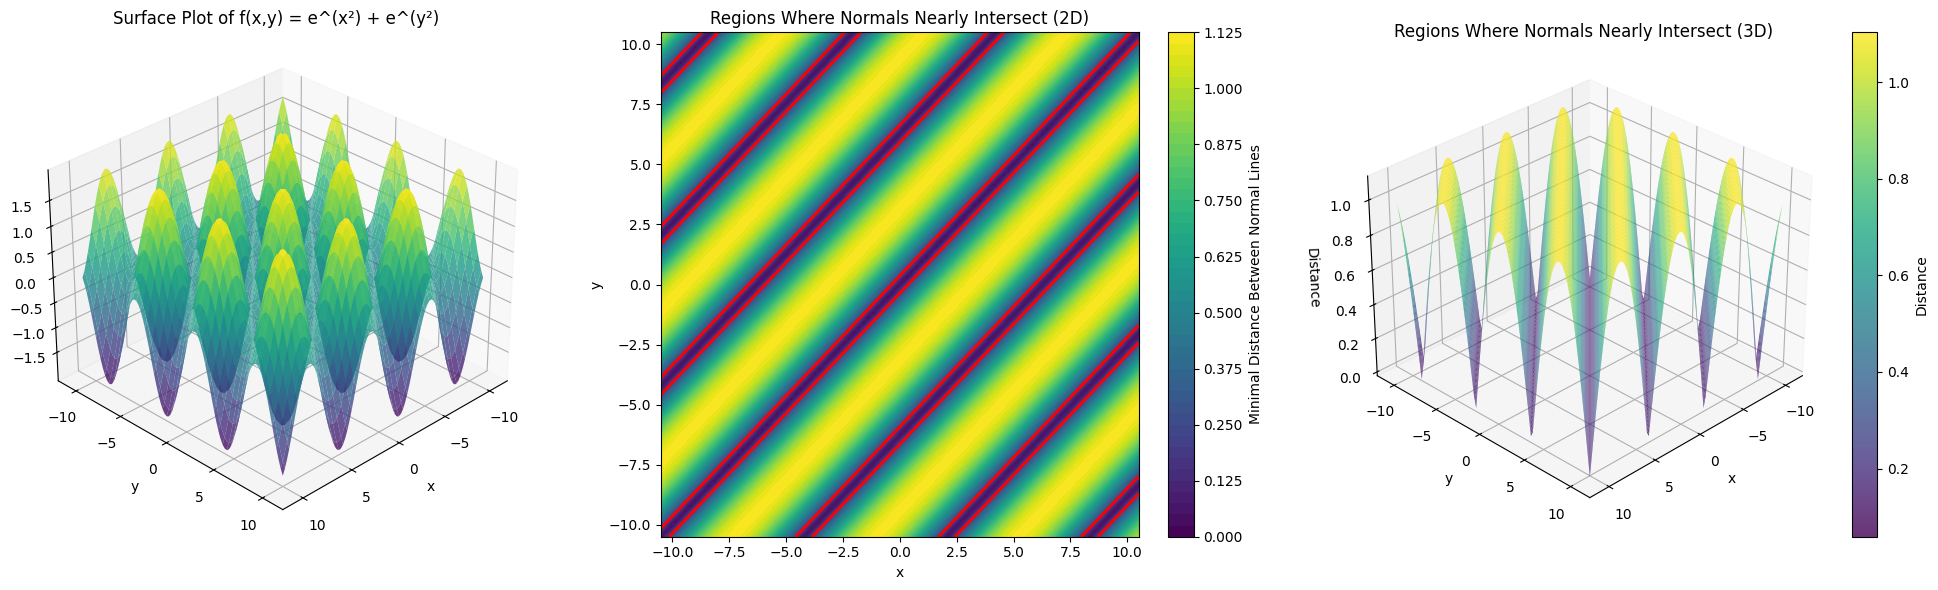

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the surface
def f(x, y):
    return np.sin(x) + np.sin(y)

def fx(x, y):
    # Using chain rule: d/dx[exp(-x^2 - y^2)] = exp(-x^2 - y^2) * d/dx[-x^2 - y^2]
    return np.cos(x) + np.sin(y)

def fy(x, y):
    # Using chain rule: d/dy[exp(-x^2 - y^2)] = exp(-x^2 - y^2) * d/dy[-x^2 - y^2]
    return np.sin(x) + np.cos(y)

# Normal vector at (x,y)
def normal(x, y):
    return np.array([fx(x,y), fy(x,y), -1.0])

# Parameters
a, b = np.pi/4, np.pi/4
k_threshold = 0.2

# Create grid
x_vals = np.linspace(-10.5, 10.5, 100)
y_vals = np.linspace(-10.5, 10.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Compute minimal distances
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i,j]
        y = Y[i,j]
        
        P = np.array([x, y, f(x,y)])
        U = normal(x,y)
        
        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a, y+b)
        
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)
        
        if cross_norm < 1e-12:
            distances[i,j] = np.inf
        else:
            QP = Q - P
            dist = abs(np.dot(QP, cross)) / cross_norm
            distances[i,j] = dist

# Create figure with two subplots
fig = plt.figure(figsize=(15, 6))

# 3D Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)  # Isometric-like view

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Modify the figure creation and plotting section:
fig = plt.figure(figsize=(20, 6))  # Increased width to accommodate third plot

# 3D Surface plot
ax1 = fig.add_subplot(131, projection='3d')  # Changed 121 to 131
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)

# Contour plot
ax2 = fig.add_subplot(132)  # Changed 122 to 132
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect (2D)")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# New 3D plot for intersections
ax3 = fig.add_subplot(133, projection='3d')
intersection_plot = ax3.plot_surface(X, Y, distances, cmap='viridis', alpha=0.8)
ax3.set_title("Regions Where Normals Nearly Intersect (3D)")
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('Distance')
ax3.view_init(elev=30, azim=45)
plt.colorbar(intersection_plot, ax=ax3, label='Distance')

plt.tight_layout()
plt.show()

Two gaussian peaks now... I except interference pattern forming

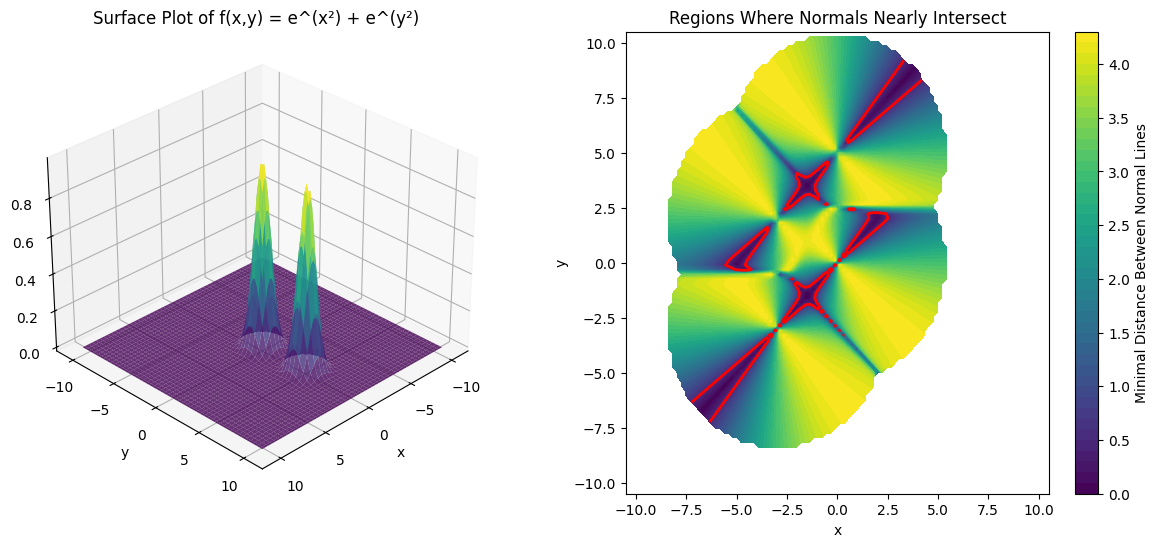

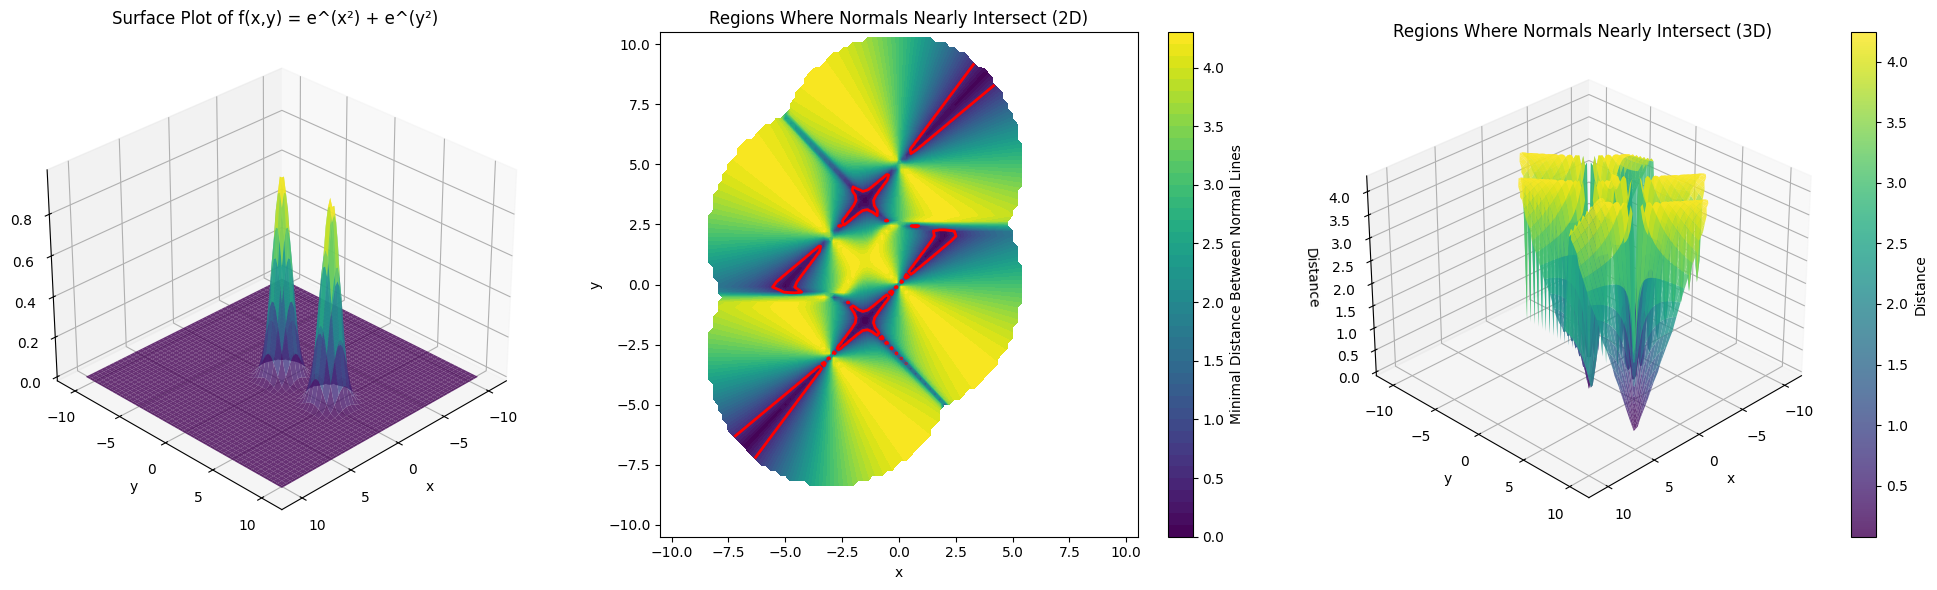

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sympy as sp
import numpy as np

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the symbolic function
f_sym = sp.exp(-(x**2 + y**2)) + sp.exp(-((x)**2 + (y-5)**2))

# Get partial derivatives symbolically
fx_sym = sp.diff(f_sym, x)
fy_sym = sp.diff(f_sym, y)

# Convert to numpy-compatible functions
f = sp.lambdify((x, y), f_sym, 'numpy')
fx = sp.lambdify((x, y), fx_sym, 'numpy')
fy = sp.lambdify((x, y), fy_sym, 'numpy')

# Normal vector at (x,y)
def normal(x, y):
    return np.array([fx(x,y), fy(x,y), -1.0])

# Parameters
a, b = 3, 3
k_threshold = 0.5

# Create grid
x_vals = np.linspace(-10.5, 10.5, 100)
y_vals = np.linspace(-10.5, 10.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Compute minimal distances
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i,j]
        y = Y[i,j]
        
        P = np.array([x, y, f(x,y)])
        U = normal(x,y)
        
        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a, y+b)
        
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)
        
        if cross_norm < 1e-12:
            distances[i,j] = np.inf
        else:
            QP = Q - P
            dist = abs(np.dot(QP, cross)) / cross_norm
            distances[i,j] = dist

# Create figure with two subplots
fig = plt.figure(figsize=(15, 6))

# 3D Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)  # Isometric-like view

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Modify the figure creation and plotting section:
fig = plt.figure(figsize=(20, 6))  # Increased width to accommodate third plot

# 3D Surface plot
ax1 = fig.add_subplot(131, projection='3d')  # Changed 121 to 131
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)

# Contour plot
ax2 = fig.add_subplot(132)  # Changed 122 to 132
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect (2D)")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# New 3D plot for intersections
ax3 = fig.add_subplot(133, projection='3d')
intersection_plot = ax3.plot_surface(X, Y, distances, cmap='viridis', alpha=0.8)
ax3.set_title("Regions Where Normals Nearly Intersect (3D)")
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('Distance')
ax3.view_init(elev=30, azim=45)
plt.colorbar(intersection_plot, ax=ax3, label='Distance')

plt.tight_layout()
plt.show()

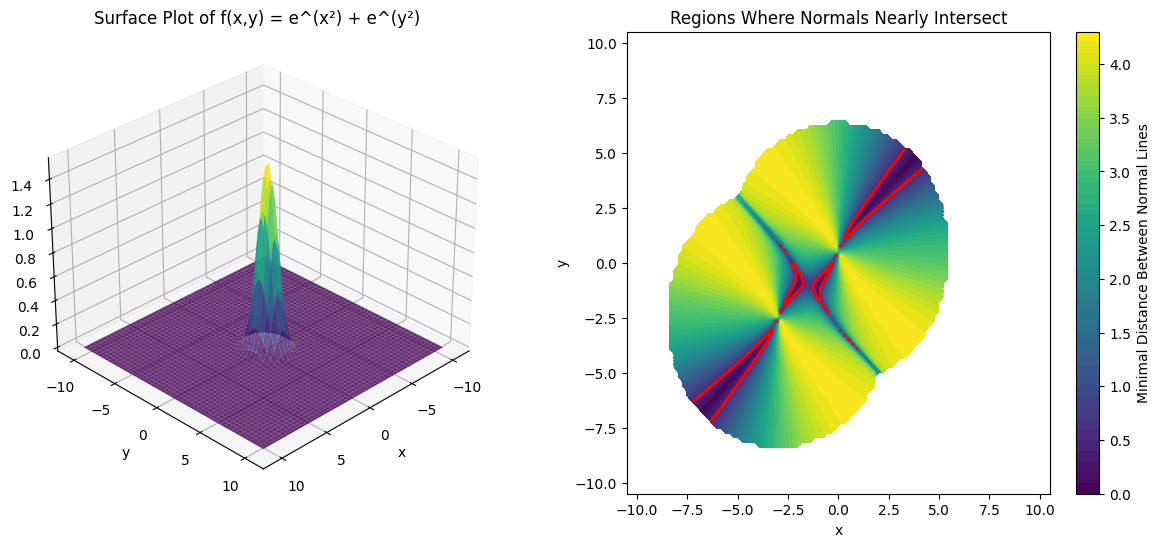

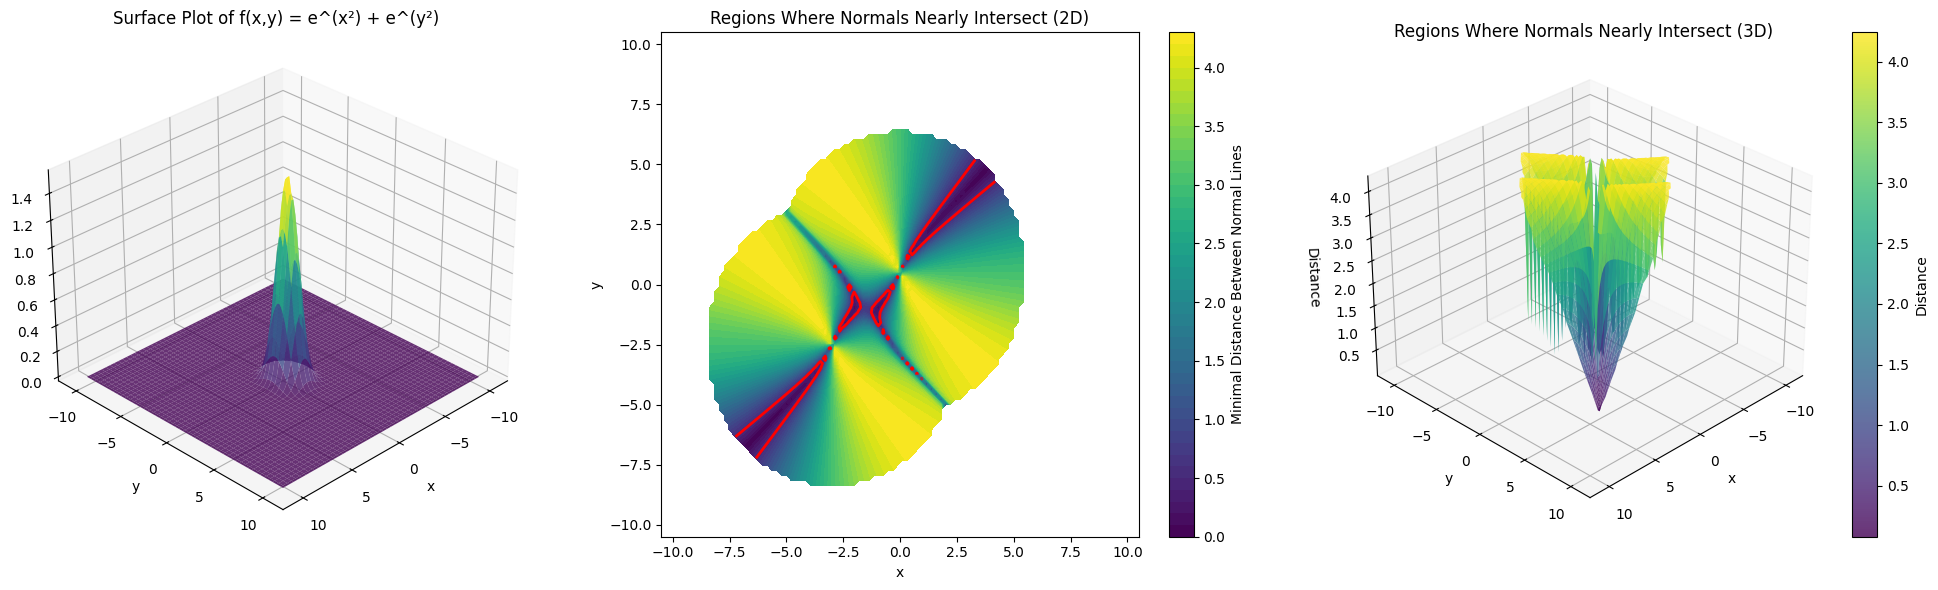

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sympy as sp
import numpy as np

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the symbolic function
f_sym = sp.exp(-(x**2 + y**2)) + sp.exp(-((x)**2 + (y-1)**2))

# Get partial derivatives symbolically
fx_sym = sp.diff(f_sym, x)
fy_sym = sp.diff(f_sym, y)

# Convert to numpy-compatible functions
f = sp.lambdify((x, y), f_sym, 'numpy')
fx = sp.lambdify((x, y), fx_sym, 'numpy')
fy = sp.lambdify((x, y), fy_sym, 'numpy')

# Normal vector at (x,y)
def normal(x, y):
    return np.array([fx(x,y), fy(x,y), -1.0])

# Parameters
a, b = 3, 3
k_threshold = 0.5

# Create grid
x_vals = np.linspace(-10.5, 10.5, 100)
y_vals = np.linspace(-10.5, 10.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Compute minimal distances
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i,j]
        y = Y[i,j]
        
        P = np.array([x, y, f(x,y)])
        U = normal(x,y)
        
        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a, y+b)
        
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)
        
        if cross_norm < 1e-12:
            distances[i,j] = np.inf
        else:
            QP = Q - P
            dist = abs(np.dot(QP, cross)) / cross_norm
            distances[i,j] = dist

# Create figure with two subplots
fig = plt.figure(figsize=(15, 6))

# 3D Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)  # Isometric-like view

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Modify the figure creation and plotting section:
fig = plt.figure(figsize=(20, 6))  # Increased width to accommodate third plot

# 3D Surface plot
ax1 = fig.add_subplot(131, projection='3d')  # Changed 121 to 131
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)

# Contour plot
ax2 = fig.add_subplot(132)  # Changed 122 to 132
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect (2D)")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# New 3D plot for intersections
ax3 = fig.add_subplot(133, projection='3d')
intersection_plot = ax3.plot_surface(X, Y, distances, cmap='viridis', alpha=0.8)
ax3.set_title("Regions Where Normals Nearly Intersect (3D)")
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('Distance')
ax3.view_init(elev=30, azim=45)
plt.colorbar(intersection_plot, ax=ax3, label='Distance')

plt.tight_layout()
plt.show()

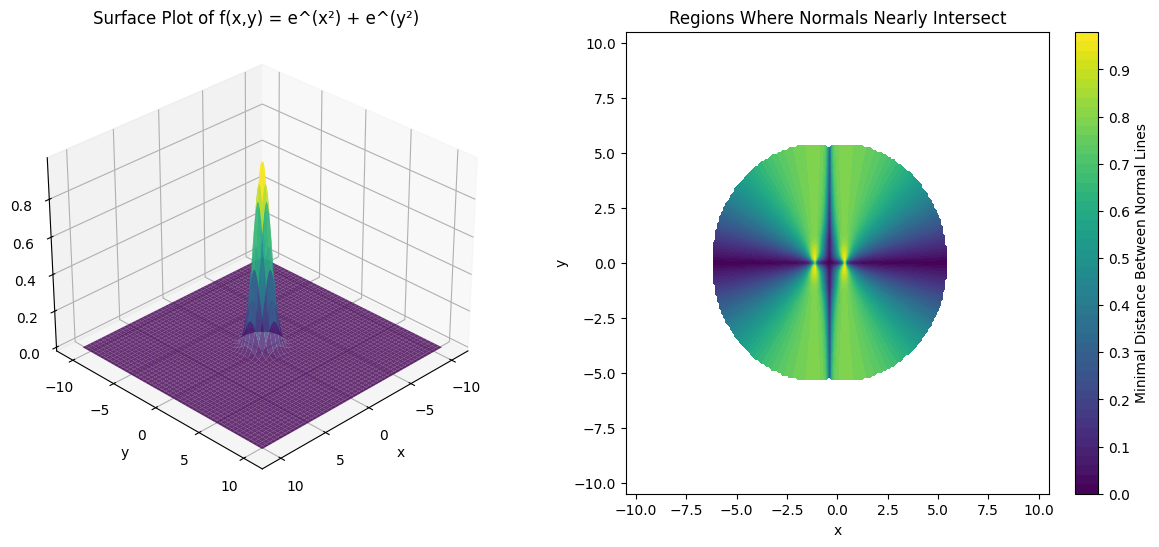

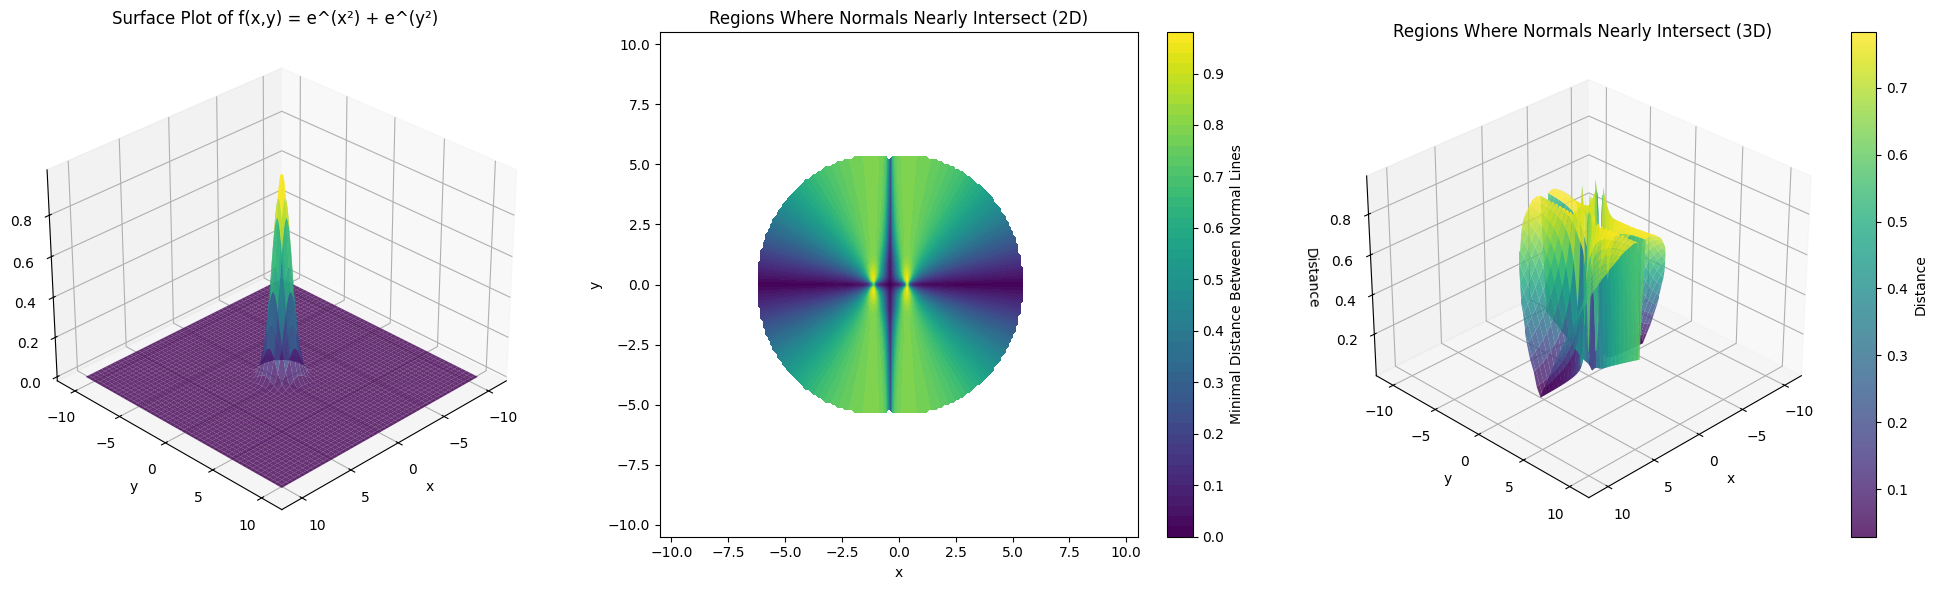

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sympy as sp
import numpy as np

# Define symbolic variables
x, y = sp.symbols('x y')

# Define the symbolic function
f_sym = sp.exp(-(x**2 + y**2))

# Get partial derivatives symbolically
fx_sym = sp.diff(f_sym, x)
fy_sym = sp.diff(f_sym, y)

# Convert to numpy-compatible functions
f = sp.lambdify((x, y), f_sym, 'numpy')
fx = sp.lambdify((x, y), fx_sym, 'numpy')
fy = sp.lambdify((x, y), fy_sym, 'numpy')

# Normal vector at (x,y)
def normal(x, y):
    return np.array([fx(x,y), fy(x,y), -1.0])

# Parameters
a, b = np.pi/4, 0
k_threshold = 0.1

# Create grid
x_vals = np.linspace(-10.5, 10.5, 200)
y_vals = np.linspace(-10.5, 10.5, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

# Compute minimal distances
distances = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i,j]
        y = Y[i,j]
        
        P = np.array([x, y, f(x,y)])
        U = normal(x,y)
        
        Q = np.array([x+a, y+b, f(x+a,y+b)])
        V = normal(x+a, y+b)
        
        cross = np.cross(U, V)
        cross_norm = np.linalg.norm(cross)
        
        if cross_norm < 1e-12:
            distances[i,j] = np.inf
        else:
            QP = Q - P
            dist = abs(np.dot(QP, cross)) / cross_norm
            distances[i,j] = dist

# Create figure with two subplots
fig = plt.figure(figsize=(15, 6))

# 3D Surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)  # Isometric-like view

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Modify the figure creation and plotting section:
fig = plt.figure(figsize=(20, 6))  # Increased width to accommodate third plot

# 3D Surface plot
ax1 = fig.add_subplot(131, projection='3d')  # Changed 121 to 131
surf = ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title("Surface Plot of f(x,y) = e^(x²) + e^(y²)")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.view_init(elev=30, azim=45)

# Contour plot
ax2 = fig.add_subplot(132)  # Changed 122 to 132
contour = ax2.contourf(X, Y, distances, levels=50, cmap='viridis')
cbar = plt.colorbar(contour, ax=ax2)
cbar.set_label('Minimal Distance Between Normal Lines')
ax2.contour(X, Y, distances, levels=[k_threshold], colors='red', linewidths=2)
ax2.set_title("Regions Where Normals Nearly Intersect (2D)")
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# New 3D plot for intersections
ax3 = fig.add_subplot(133, projection='3d')
intersection_plot = ax3.plot_surface(X, Y, distances, cmap='viridis', alpha=0.8)
ax3.set_title("Regions Where Normals Nearly Intersect (3D)")
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('Distance')
ax3.view_init(elev=30, azim=45)
plt.colorbar(intersection_plot, ax=ax3, label='Distance')

plt.tight_layout()
plt.show()